In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
X = mnist.data
y = mnist.target
pca = PCA()

x_pca = pca.fit_transform(X)

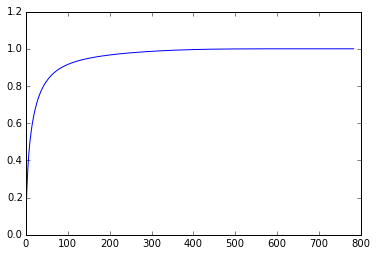

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
import timeit

X = x_pca[:,0:100]
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

knn = KNeighborsClassifier(n_neighbors=5, n_job=-1)

start = timeit.time.time()
knn.fit(X_train,y_train)
end = timeit.time.time()


end-start

C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.


TypeError: __init__() got an unexpected keyword argument 'n_job'

In [ ]:
start = timeit.time.time()
y_pred = knn.predict(X_test)
end = timeit.time.time()

end-start

In [ ]:
k_array = np.arange(1,36)
scores = np.array([])

for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = np.append(scores, cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
plt.plot(k_array, scores)